# A3b: Filtering  
Finn Hittson - fxh157  
CSDS 464  
Due: March 6th, 2023  

## 1 Filtering

### 1a. A moving average filter

Part (A):  
$y_M[n]$ has the form
$$
y_M[n]=\frac{1}{M}\sum_{k=0}^{M-1}x[n-k]=\frac{1}{M}(x[n]+x[n-1]+\cdots+x[n-M+1]).
$$
$y_{M-1}[n-1]$ has the form
$$
y_{M-1}[n-1]=\frac{1}{M-1}\sum_{k=0}^{M-2}x[n-k-1]=\frac{1}{M-1}(x[n-1]+x[n-2]+\cdots+x[n-M+1]).
$$
Distribute the $\frac{1}{M}$ in $y_M[n]$.
$$
y_M[n]=\frac{x[n]}{M}+\frac{x[n-1]}{M}+\cdots+\frac{x[n-M+1]}{M}
$$
Set $1-\lambda=\frac{1}{M}$. This makes $\lambda=\frac{M-1}{M}$. Reformat the expression.
$$
y_M[n]=(1-\lambda)x[n]+\frac{1}{M}\sum_{k=0}^{M-1}x[n-k-1]=(1-\lambda)x[n]+y_M[n-1]
$$
Note that $\lambda y_{M-1}[n-1]=y_M[n-1]$ so making this substitution gives us the desired result.
$$
y_M[n]=\lambda y_{M-1}[n-1]+(1-\lambda)x[n]
$$

Part (B):  
Write the derived expression in the form of summations.
$$
\frac{1}{M}\sum_{k=0}^{M-1}x[n-k]=\lambda\frac{1}{M-1}\sum_{k=0}^{M-2}x[n-k-1]+(1-\lambda)x[n]
$$
Approximate $\frac{1}{M-1}\sum_{k=0}^{M-2}x[n-k-1]\approx\frac{1}{M}\sum_{k=0}^{M-1}x[n-k-1]$ since for large $M$ the difference will be negligible and simplify the expression.
$$
\frac{1}{M}\sum_{k=0}^{M-1}x[n-k]\approx\lambda\frac{1}{M}\sum_{k=0}^{M-1}x[n-k-1]+(1-\lambda)x[n]
$$
Let $y[n]=\frac{1}{M}\sum_{k=0}^{M-1}x[n-k]$ to get our desired result.
$$
y[n]=\lambda y[n-1]+(1-\lambda)x[n]
$$

Part (C):  
When $\lambda$ is increased, this causes $y[n-1]$ to become closer in value to $y[n]$ and has the opposite effect when $\lambda$ is decreased. 

### 1b. Implementation

In [1]:
import A3b_fxh157 as a3b
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../464-A3a_fxh157_files/')
import A3a_fxh157 as a3a

sys.path.append('../464-A1b_fxh157_files/')
import A1b_fxh157 as a1b

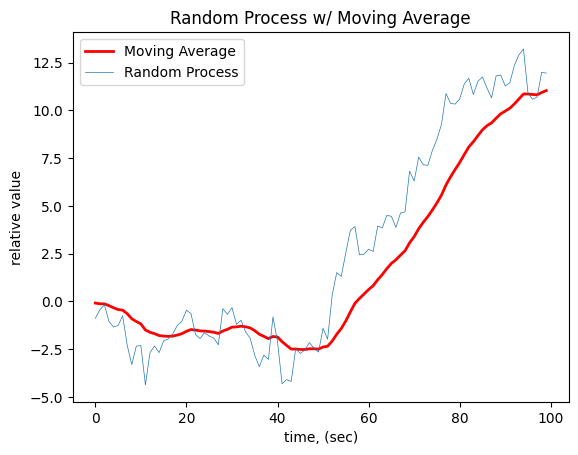

In [2]:
rand = a3b.randprocess(N=100, s=1.0)
avg = a3b.movingavg(x=rand, l=0.9)
a3b.plot_movingavg(rand=rand, avg=avg, tunits="msec")

shifted


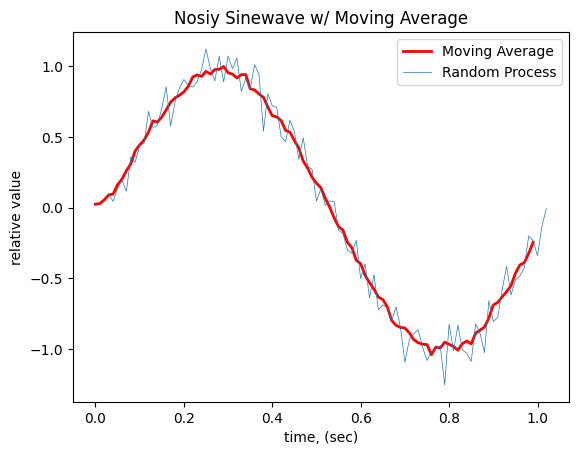

In [3]:
t, x, n = a3a.noisysignal(t=0, g=a1b.sinewave, fs=100, tau=0, T=1, s=0.1, tscale=1, f=1)
avg = a3b.movingavg(x+n, l=0.75)
a3b.plot_movingavg(rand=x+n, avg=avg, t=t, shift=0.03, title="Nosiy Sinewave w/ Moving Average", tunits="sec")

### 1c. System delay
There is a system delay because the moving average consistes of elements prior to the current location of the signal. Therefore for the moving average to reflect the signal's true location it needs the averaged elements to be centered on that specific location which only occurs in a later frame that is averaged. 

200
shifted


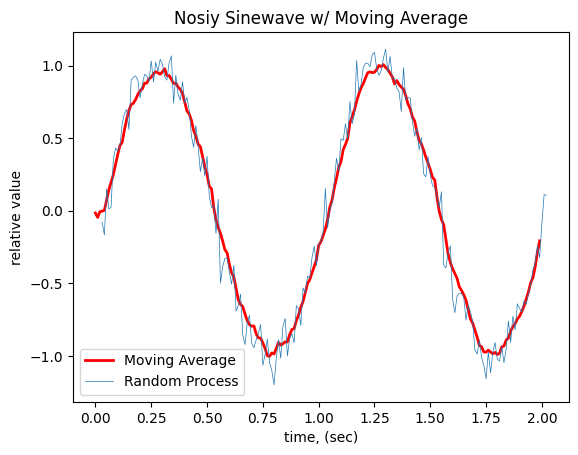

In [4]:
t, x, n = a3a.noisysignal(t=0, g=a1b.sinewave, fs=100, tau=0.0, T=2, s=0.1, tscale=1, f=1)
avg = a3b.movingavg(x+n, l=0.8)
print(len(avg))
a3b.plot_movingavg(rand=x+n, avg=avg, t=t, shift=0.03, title="Nosiy Sinewave w/ Moving Average", tunits="sec")

## 2. IRR Filters

### 2a. Implementation

In [5]:
rand = a3b.randprocess(N=100, s=0.1)
a = [-1.265, 0.81]
b = [0.135]
filtered = a3b.filterIIR(x=rand, a=a, b=b)

### 2b. First order low- and high-pass IIR filters

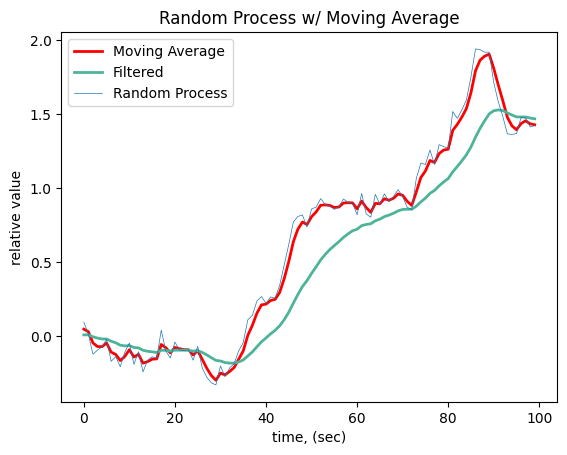

In [6]:
rand = a3b.randprocess(N=100, s=0.1)
avg = a3b.movingavg(x=rand, l=0.5)
a = [-0.9]
b = [0.1]
filtered = a3b.filterIIR(x=rand, a=a, b=b)
a3b.plot_movingavg(rand=rand, avg=avg, filtered=filtered)

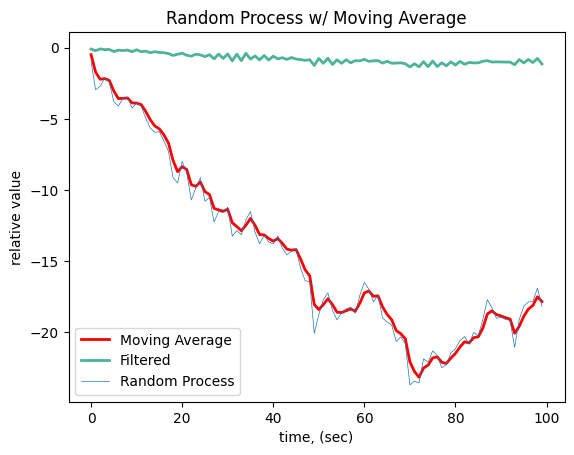

In [7]:
rand = a3b.randprocess(N=100, s=1.0)
avg = a3b.movingavg(x=rand, l=0.5)
a = [0.9]
b = [0.1]
filtered = a3b.filterIIR(x=rand, a=a, b=b)
a3b.plot_movingavg(rand=rand, avg=avg, filtered=filtered)

### 2c. Second order bandpass filters

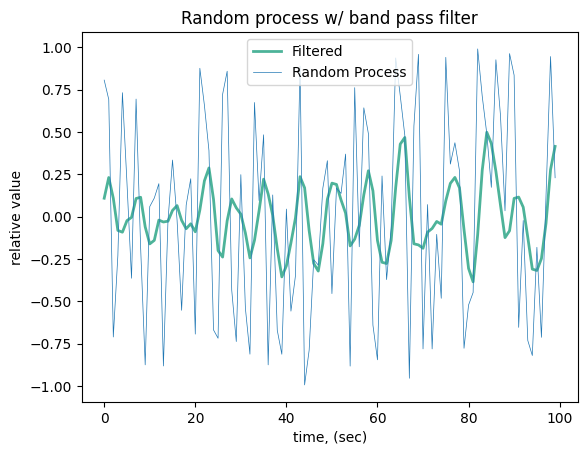

In [8]:
#np.random.seed(10)
rand = a3b.randprocess(N=100, s=0.1, ntype="uniform")
avg = a3b.movingavg(x=rand, l=0.5)
a = [-1.265, 0.81]
b = [0.135]
filtered = a3b.filterIIR(x=rand, a=a, b=b)
a3b.plot_movingavg(rand=rand, filtered=filtered, title="Random process w/ band pass filter")

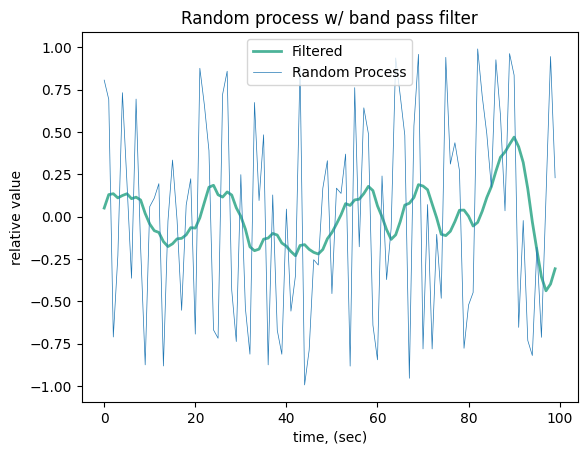

In [9]:
a = [-1.702, 0.81]
b = [0.063]
filtered = a3b.filterIIR(x=rand, a=a, b=b)
a3b.plot_movingavg(rand=rand, filtered=filtered, title="Random process w/ band pass filter")

### 2d. Characterizing the filter response

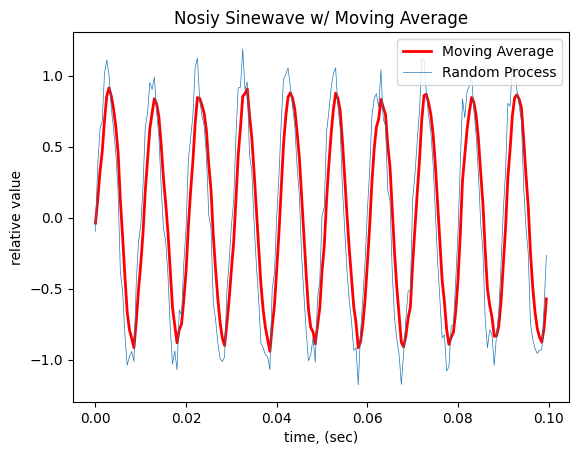

In [10]:
t, x, n = a3a.noisysignal(t=0, g=a1b.sinewave, fs=2000, tau=0, T=0.1, s=0.1, tscale=1, f=100)
avg = a3b.movingavg(x+n, l=0.6)
a3b.plot_movingavg(rand=x+n, avg=avg, t=t, title="Nosiy Sinewave w/ Moving Average", tunits="sec")

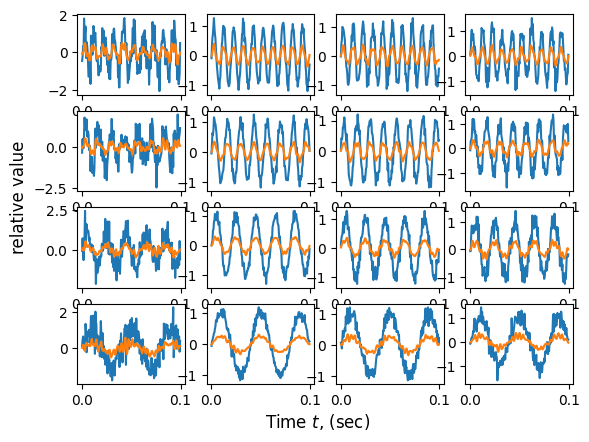

In [11]:
g = a1b.sinewave
a = [-1.265, 0.81]
b = [0.135]
rows = 4
cols = 4
fs = 2000
tau = 0 
T = 0.1
tscale = 1.0 
s = [0.5, 0.1, 0.15, 0.2]
f = [100, 75, 50, 25]

a3b.plot_filter_grid(g=g, a=a, b=b, rows=rows, cols=cols, fs=fs, tau=tau, T=T, tscale=tscale, s=s, f=f)

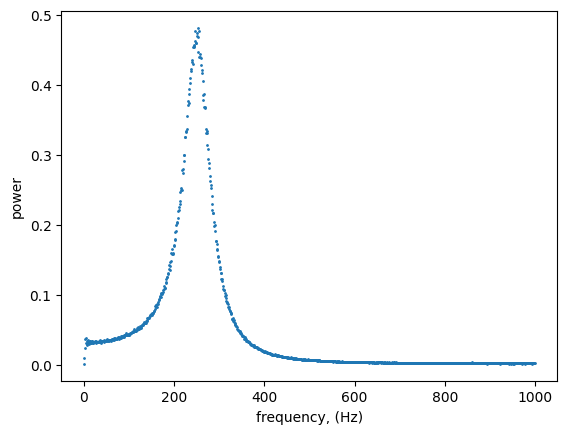

In [12]:
a = [-1.265, 0.81]
b = [0.135]
fs = 2000
freqs = np.arange(0, fs/2, 1)
p = []
for f in freqs:
    t, x, n = a3a.noisysignal(t=0, g=a1b.sinewave, fs=fs, tau=0, T=0.1, s=0.1, tscale=1, f=f)
    filtered = a3b.filterIIR(x=x+n, a=a, b=b)
    p.append(a3a.power(filtered))
plt.scatter(freqs, p, s=1)
plt.xlabel("frequency, (Hz)")
plt.ylabel("power")
plt.show()

## 3. The impulse response function

### 3a. Deriving the impulse response function
$$
x[n]=\sum_{k=-\infty}^\infty x[k]\delta[n-k]
$$
$$
\mathcal{H}\left(x[n]\right)=\mathcal{H}\left(\sum_{k=-\infty}^\infty x[k]\delta[n-k]\right)
$$
$$
\mathcal{H}\left(x[n]\right)=\sum_{k=-\infty}^\infty \mathcal{H}\left(x[k]\delta[n-k]\right)
$$
Need linearity to factor out constant $x[k]$ from $\mathcal{H}\left(x[k]\delta[n-k]\right)$.
$$
\mathcal{H}\left(x[n]\right)=\sum_{k=-\infty}^\infty x[k]\mathcal{H}\left(\delta[n-k]\right)
$$
Need time invariance since the delta function operates with and without a time delay. Therefore $\mathcal{H}\left(\delta[n-k]\right)=h[n-k]$.
$$
\mathcal{H}\left(x[n]\right)=\sum_{k=-\infty}^\infty x[k]h[n-k]
$$
$$
h[n]=\begin{cases}
\text{undefined} & n = 0\\
0 & n \neq 0
\end{cases}

### 3b. Impulse responses

In [13]:
import matplotlib.pyplot as plt

def impulse(x, fs, tscale, f):
    y = []
    t = []
    idx = 0
    while idx < len(x):
        t.append(idx/len(x)/fs)
        y.append(x[int(idx)])
        idx += f/fs*tscale
    return t, y

def plot_impulse(t, y, t0=None, x0=None, rand=None):
    if x is not None and t0 is not None:
        plt.plot(t0, x0, '#4DB399', linewidth=5, label="filtered", zorder=10)
    if rand is not None:
        plt.plot(t0, rand, label="noise", linewidth=1)
    plt.plot(t, y, 'r', label='impulse', zorder=10)
    plt.legend()
    plt.show()

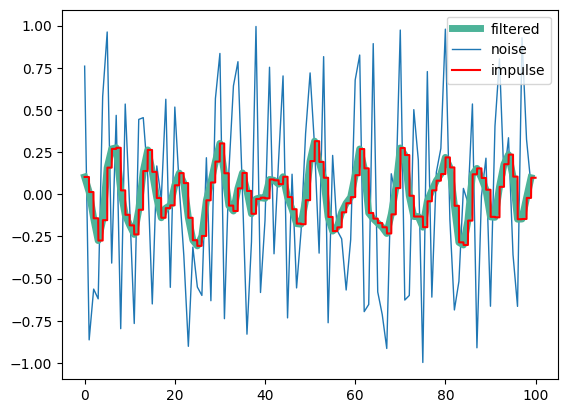

In [14]:
rand = a3b.randprocess(N=100, s=0.1, ntype="uniform")
a = [-1.265, 0.81]
b = [0.135]
filtered = a3b.filterIIR(x=rand, a=a, b=b)
#a3b.plot_movingavg(rand=rand, filtered=filtered)
t, y = impulse(filtered, fs=2000, tscale=1, f=100)
plot_impulse(t=np.array(t)*200000, y=y, t0=list(range(0,100)), x0=filtered, rand=rand)

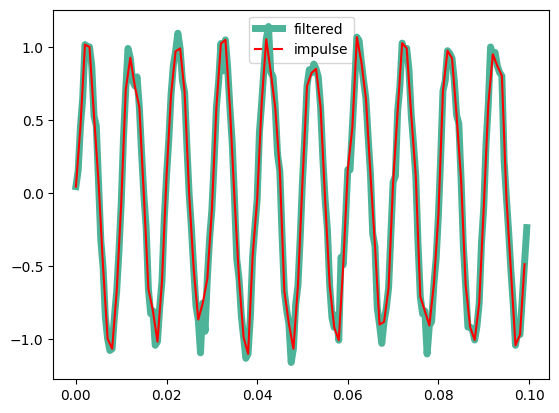

In [15]:
t0, x0, n0 = a3a.noisysignal(t=0, g=a1b.sinewave, fs=2000, tau=0, T=0.1, s=0.1, tscale=1, f=100)
avg = a3b.movingavg(x0+n, l=0.6)
#a3b.plot_movingavg(rand=x0+n0, avg=avg, t=t0, title="Nosiy Sinewave w/ Moving Average", tunits="sec")

t, y = impulse(x=x0+n0, fs=10, tscale=0.01, f=2000)
plot_impulse(t=t, y=y, t0=t0, x0=x0+n0)

## 4. Filtering with convolution

### 4a. Implementing convolution 

In [16]:
def d(x):
    return 1 if x == 0 else 0

def convolve(x, h, h0:int=1):
    y = []
    if h0 == 1: # causal filter: x[k<=n]
        for n in range(0, len(x)):
            y.append(0)
            for k in range(len(h)):
                if n-k >= 0:
                    y[-1] += x[n-k]*h[-1-k]

    elif h0 == 0: # non causal filter: x[k>n]
        for n in range(0, len(x)):
            y.append(0)
            for k in range(len(h)):
                if n-k >= 0:
                    y[-1] += x[n-k-len(h)//2]*h[-1-k]
    return y

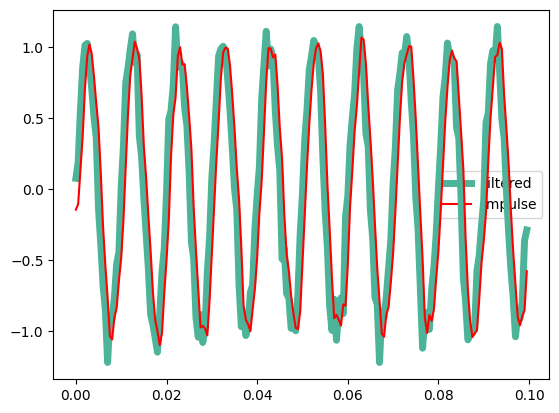

In [17]:
t0, x0, n0 = a3a.noisysignal(t=0, g=a1b.sinewave, fs=2000, tau=0, T=0.1, s=0.1, tscale=1, f=100)
y = convolve(x=x0+n0, h=[0.5, 0.5], h0=0)
plot_impulse(t=t0, y=y, t0=t0, x0=x0+n0)

### 4b. FIR filtering

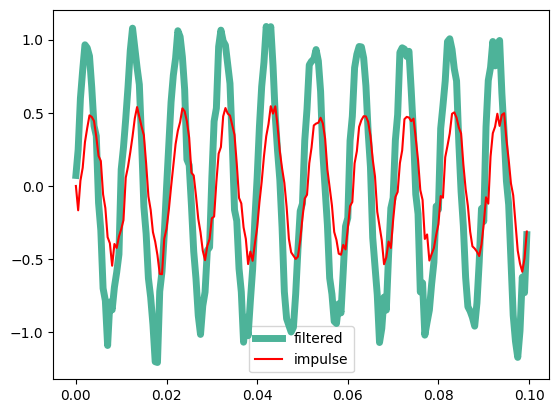

In [18]:
t0, x0, n0 = a3a.noisysignal(t=0, g=a1b.sinewave, fs=2000, tau=0, T=0.1, s=0.1, tscale=1, f=100)
y = convolve(x=x0+n0, h=[0.5, 0], h0=0)
plot_impulse(t=t0, y=y, t0=t0, x0=x0+n0)

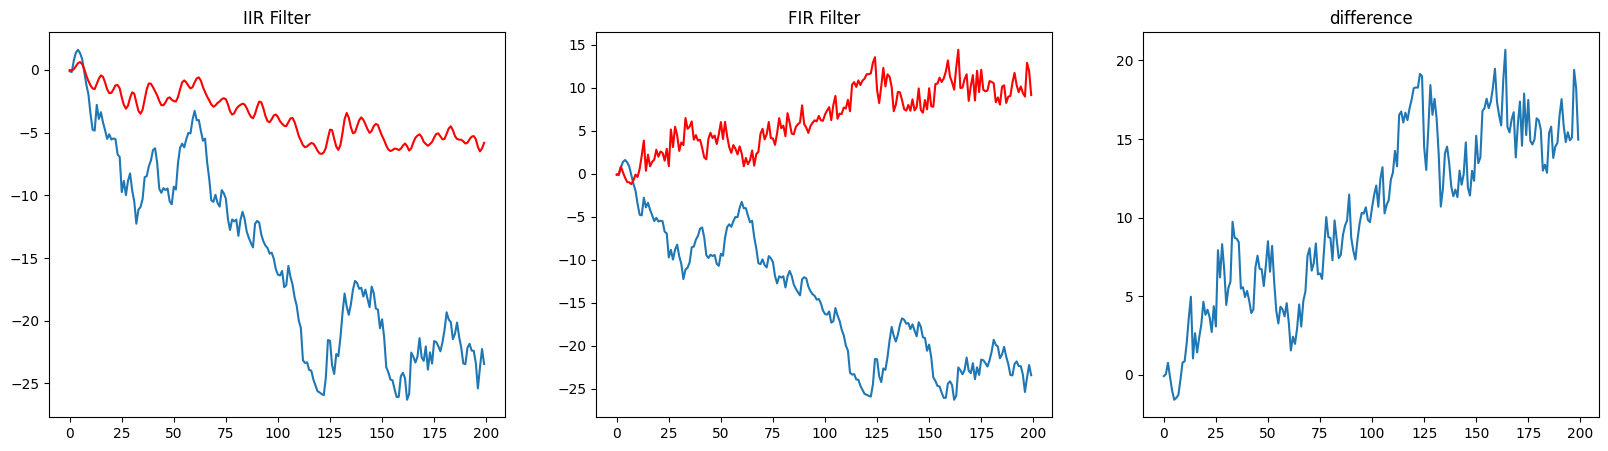

In [19]:
x = a3b.randprocess(N=200, ntype="gaussian")
a = [-1.265, 0.81]
b = [0.135]
filtered = a3b.filterIIR(x=x, a=a, b=b)
t, y = impulse(filtered, fs=2000, tscale=1, f=100)

fig, axs = plt.subplots(1,3,figsize=(20,5))
axs[0].plot(list(range(0,len(x))), x, '#1f77b4')
axs[0].plot(list(range(0,len(x))), filtered, 'r')
axs[0].set_title("IIR Filter")

y = convolve(x=x, h=a, h0=1)
axs[1].plot(list(range(0,len(x))), x, '#1f77b4')
axs[1].plot(list(range(0,len(x))), y, 'r')
axs[1].set_title("FIR Filter")

axs[2].plot(list(range(0,len(x))), np.array(y) - np.array(filtered), '#1f77b4')
axs[2].set_title("difference")
plt.show()

### 4c. Using matched filters to detect signals in noise

uniform


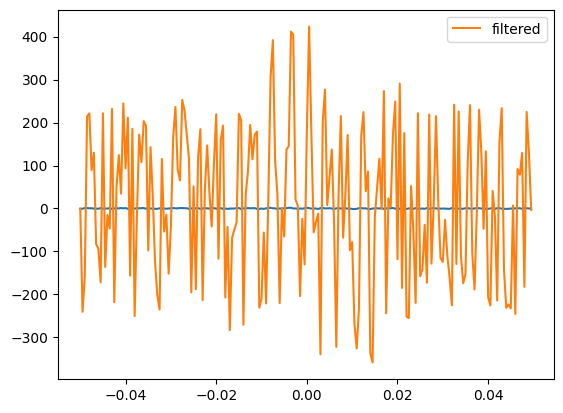

In [20]:
t0, x0, n0 = a3a.noisysignal(t=-0.05, g=a1b.gabore, fs=2000, tau=0.0, T=0.05, s=0.1, ntype="uniform", tscale=1, f=250, sigma=3/250)
y = convolve(x=x0+n0, h=[250, 3/250], h0=1)
#plot_impulse(t=t0, y=y, t0=t0, x0=x0+n0)
plt.plot(t0, x0+n0)
plt.plot(t0, y, label="filtered")
plt.legend()
plt.show()

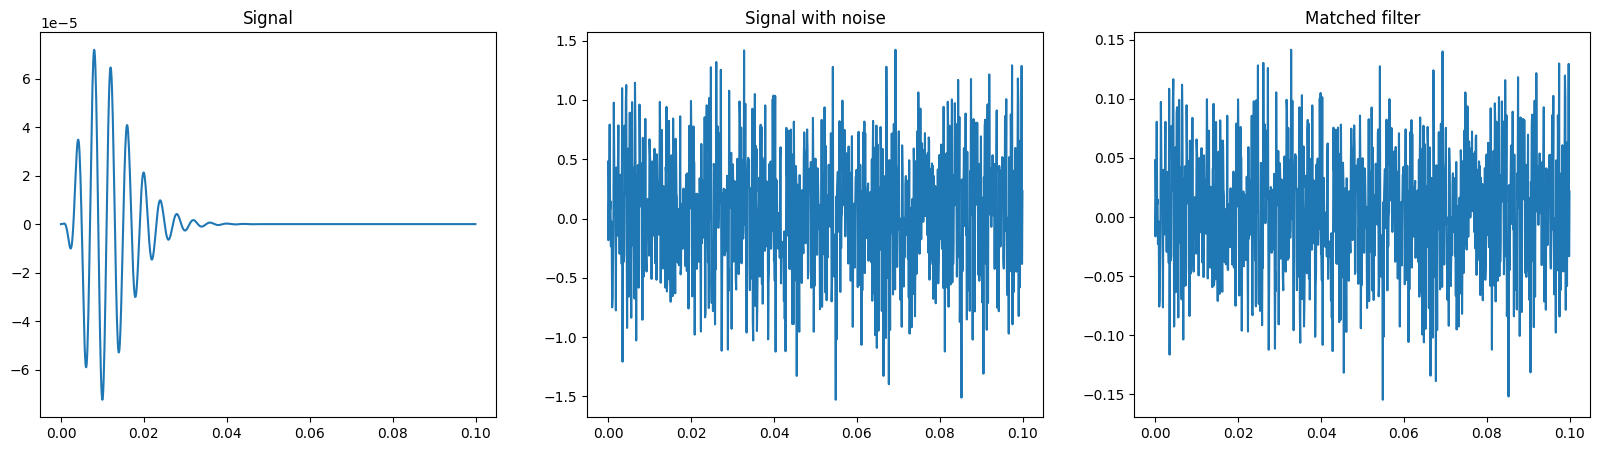

In [32]:
t0, x0, n0 = a3a.noisysignal(t=0, g=a1b.gammatone, fs=10000, tau=0, T=0.1, s=0.5, ntype="gaussian", tscale=1, f=250)

fig, axs = plt.subplots(1,3,figsize=(20,5))
axs[0].plot(t0, x0, '#1f77b4')
axs[0].set_title("Signal")

axs[1].plot(t0, x0+n0, '#1f77b4')
axs[1].set_title("Signal with noise")

y = convolve(x=x0+n0, h=[250, 0.1], h0=1)
axs[2].plot(t0, y, '#1f77b4')
axs[2].set_title("Matched filter")
plt.show()